In [ ]:
Q&A Activity Question Week -10
Do the following on the dataset
1. Load the data into the pandas environment and identify some basic details of the
dataset.
2. Reset the index as "name" as the index.
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10. Do the standard scaling on the feature performance score.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [25]:
dsEmp = pd.read_csv('employee.csv')

In [3]:
dsEmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


# the dataset contains 9 rows and 7 columns
# age,income and gender columns contains null values

# 2. Reset the index as "name" as the index.

In [26]:
dsEmp.set_index('name')

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills.

In [27]:
dsEmp.loc[dsEmp['name'].isin(['Jack Morgan', 'Josh Wills'])]

,name,age,income,gender,department,grade,performance_score
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
7,Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.

In [6]:
dsEmp.loc[dsEmp['department'].isin(['Sales', 'Finance'])]

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score.

In [7]:
dsEmp[dsEmp['performance_score'] >700]

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score

In [8]:
dsEmp.loc[(dsEmp['performance_score'] >500) & (dsEmp['performance_score'] <700) ]

,name,age,income,gender,department,grade,performance_score
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

In [28]:
dsEmp.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [29]:
dsEmp["age"] =dsEmp["age"].fillna(dsEmp["age"].median())
dsEmp["income"] =dsEmp["income"].fillna(dsEmp["income"].median())
dsEmp["gender"] =dsEmp["gender"].fillna(dsEmp["gender"].mode().iloc[0])
dsEmp.isna().sum()

name                 0
age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

In [30]:
dsEmp

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,52000.0,F,Operations,G3,723
1,S Kumar,45.0,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,45.0,62000.0,F,Sales,G3,649
6,James Authur,54.0,52000.0,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


# 8. Check the outliers and handle outliers in performance score using Percentiles.

Text(0.5, 1.0, 'Boxplot of performance_score')

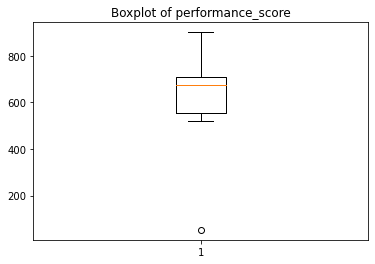

In [31]:
plt.boxplot(dsEmp["performance_score"])
plt.title("Boxplot of performance_score")

In [32]:
Q1 = dsEmp['performance_score'].quantile(0.25)
Q3 = dsEmp['performance_score'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
score_outliers = dsEmp[(dsEmp['performance_score'] < Q1 - whisker_width*IQR) | (dsEmp['performance_score'] > Q3 + whisker_width*IQR)]
score_outliers.head()

,name,age,income,gender,department,grade,performance_score
6,James Authur,54.0,52000.0,F,Operations,G3,53


# only one outlier in the performance_score.
# updating the outlier 

In [33]:
Q1 = dsEmp['performance_score'].quantile(0.25)
Q3 = dsEmp['performance_score'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
dsEmp['performance_score']=np.where(dsEmp['performance_score']>upper_whisker,upper_whisker,np.where(dsEmp['performance_score']<lower_whisker,lower_whisker,dsEmp['performance_score']))

# Checking outliers after update

In [34]:
Q1 = dsEmp['performance_score'].quantile(0.25)
Q3 = dsEmp['performance_score'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
score_outliers = dsEmp[(dsEmp['performance_score'] < Q1 - whisker_width*IQR) | (dsEmp['performance_score'] > Q3 + whisker_width*IQR)]
score_outliers.head()

,name,age,income,gender,department,grade,performance_score


Text(0.5, 1.0, 'Boxplot of performance_score')

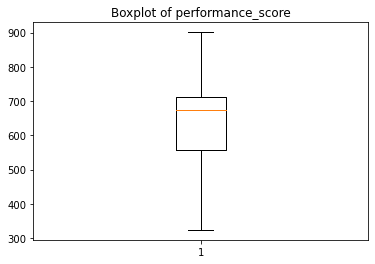

In [35]:
plt.boxplot(dsEmp["performance_score"])
plt.title("Boxplot of performance_score")

# 9. Check the gender column and do Dummy encoding.

In [36]:
dsEmp

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,52000.0,F,Operations,G3,723.0
1,S Kumar,45.0,16000.0,F,Finance,G0,520.0
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674.0
3,Ying Chin,45.0,65000.0,F,Sales,G3,556.0
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711.0
5,Satyam Sharma,45.0,62000.0,F,Sales,G3,649.0
6,James Authur,54.0,52000.0,F,Operations,G3,323.5
7,Josh Wills,54.0,52000.0,F,Finance,G3,901.0
8,Leo Duck,23.0,98000.0,M,Sales,G4,709.0


In [38]:
ds = pd.get_dummies(dsEmp["gender"],prefix='gender_')
ds

,gender__F,gender__M
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1


# 10. Do the standard scaling on the feature performance score.

In [39]:
dsEmp.describe()

,age,income,performance_score
count,9.000000,9.000000,9.000000
mean,41.444444,52666.666667,640.722222
std,10.760008,22544.400635,161.118185
min,23.000000,16000.000000,323.500000
25%,32.000000,42000.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,45.000000,62000.000000,711.000000
max,54.000000,98000.000000,901.000000


In [40]:
from sklearn import preprocessing

In [56]:
dsEmp = pd.get_dummies(dsEmp)
X = dsEmp.loc[:,["performance_score"]]
standard = preprocessing.StandardScaler()
X =standard.fit_transform(X)
X

array([[ 0.5416444 ],
       [-0.79472875],
       [ 0.21907157],
       [-0.55773646],
       [ 0.46264697],
       [ 0.0544936 ],
       [-2.08831162],
       [ 1.71343957],
       [ 0.44948073]])